<a href="https://colab.research.google.com/github/LucasMontero/neural_network/blob/master/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

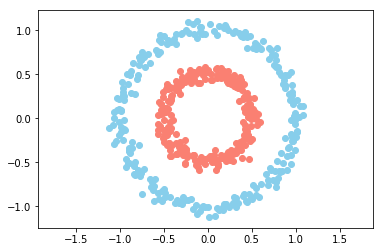

In [11]:
# Dataset creation

n = 500
p = 2

X, Y = make_circles(n_samples = n, factor = 0.5, noise = 0.05)

plt.scatter(X[Y == 0 , 0], X[Y == 0 ,1], c='skyblue')
plt.scatter(X[Y == 1 , 0], X[Y == 1 ,1], c='salmon')
plt.axis('equal')
plt.show()

In [0]:
# Network layer class

class neural_layer():
  def __init__(self, n_connections, n_neurons, activation_function):
    
    self.activation_function = activation_function
    
    self.bias = np.random.rand(1, n_neurons)          * 2 -1
    self.W = np.random.rand(n_connections, n_neurons) * 2 -1

In [0]:
# Activation functions

sigmoid = (lambda x: 1/(1 + np.e ** (-x)),
           lambda x: x * (1-x))

relu = lambda x : np.maximum(0, x)

# representation
# _x = np.linspace(-5, 5, 100)
# plt.plot(_x, sigmoid[1](_x))

In [24]:
layer0 = neural_layer(p, 4, sigmoid)
layer1 = neural_layer(4, 8, sigmoid)
# ...

def create_neural_network(topology, activation_function):
  
  neural_network = []
  
  for i, layer in enumerate(topology[:-1]):
    neural_network.append(neural_layer(topology[i], topology[i+1], activation_function))
    
  return neural_network

topology = [p, 4, 8, 16, 8, 4, 1]

create_neural_network(topology, sigmoid)
  